In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

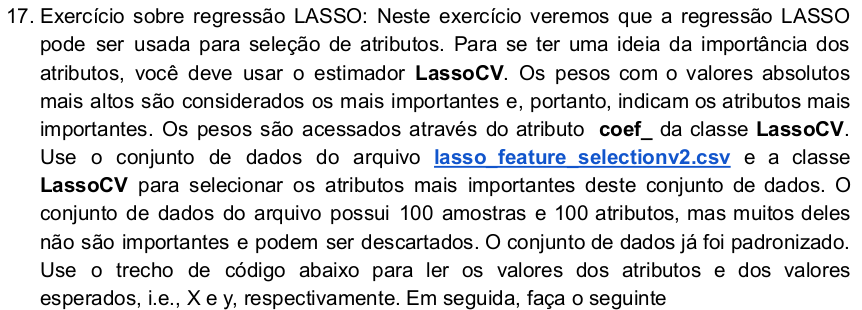

In [6]:
df = pd.read_csv('./lasso_feature_selectionv2.csv', header=None)
D = df.to_numpy()
X = D[:,0:D.shape[1]-1]
Y = D[:,D.shape[1]-1]

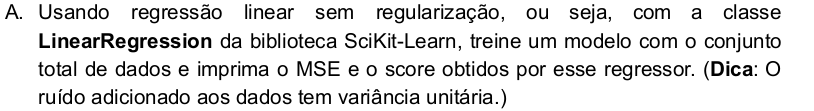

In [19]:
linRe = LinearRegression()
linRe.fit(X,Y)
predict = linRe.predict(X)
err=mean_squared_error(Y,predict)
score = r2_score(Y, predict)
print('MSE:',err)
print('Score:',score)

MSE: 1.1190028721199758e-25
Score: 1.0


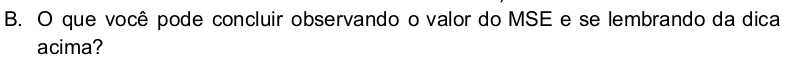

# Pode-se afirmar que o modelo foi ajustado com grande precisão

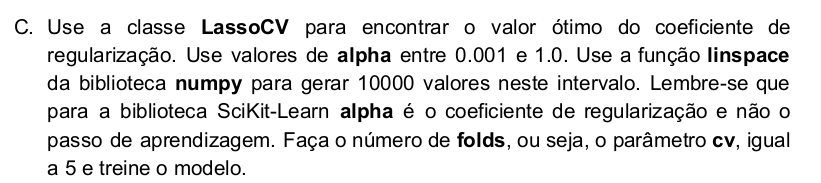

In [37]:
alph = np.linspace(0.001,1,num = 10000)
lasso = LassoCV(n_alphas = 10000, alphas = alph, cv = 5)
lasso.fit(X,Y)

LassoCV(alphas=array([0.001     , 0.00109991, 0.00119982, ..., 0.99980018, 0.99990009,
       1.        ]),
        cv=5, n_alphas=10000)

In [29]:
predictLasso = lasso.predict(X)
errLasso=mean_squared_error(Y,predictLasso)
scoreLasso = r2_score(Y, predictLasso)
print('MSE:',errLasso)
print('Score:',scoreLasso)

MSE: 0.6824315760306147
Score: 0.9999599928197254


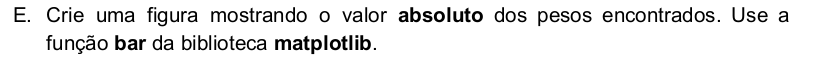

<Figure size 432x432 with 0 Axes>

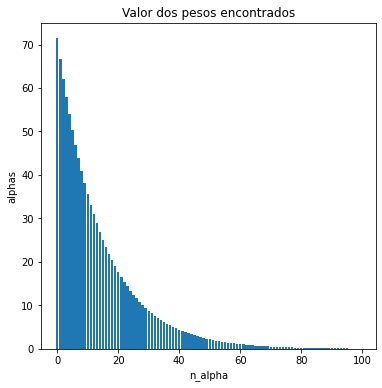

In [54]:
alphas, coefs, dualgaps =lasso.path(X,Y)
plt.figure(figsize=(6,6))
plt.figure(figsize=(6,6))
plt.title('Valor dos pesos encontrados')
plt.xlabel('n_alpha')
plt.ylabel('alphas')
plt.bar(range(0,100),alphas )
plt.show()

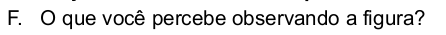

# Nota=se que os alphas obtidos decrescem.

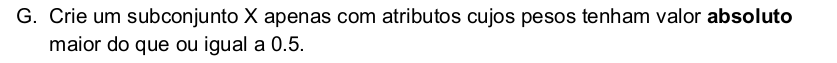

In [119]:
cont = 0
Xsub = np.zeros((71,1))
for j in range(1,100):
    if(alphas[j]>=0.5):
        Xsub[cont] = alphas[j]
        cont+=1
        
#Xsub

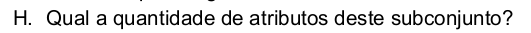

In [118]:
Xsub.shape

(71, 1)

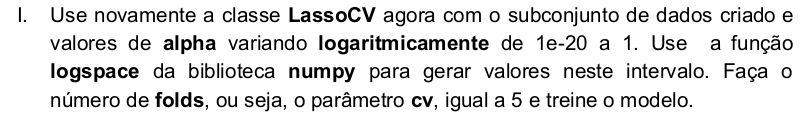

In [136]:
X_use = X[0:71]
Y_use = Y[0:71]
alphlog = np.logspace(1e-20,1,num = 10000)
lasso_sub = LassoCV(n_alphas = 10000, alphas = alph, cv = 5)
lasso_sub.fit(X_use,Y_use )

In [142]:
predictLasso_use = lasso_sub.predict(X_use)
errLasso_use=mean_squared_error(Y_use,predictLasso_use)
scoreLasso_use = r2_score(Y, predictLasso)
print('MSE:',errLasso_use)
print('Score:',scoreLasso_use)

MSE: 0.42237270273168487
Score: 0.9999599928197254
